In [31]:
import os.path as path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
RESULTS_PATH = 'results'
df = pd.read_csv(path.join(RESULTS_PATH, 'abortion_results.csv'))

## Total number of players

We compare the total number of players over time in the model with respect to the network.


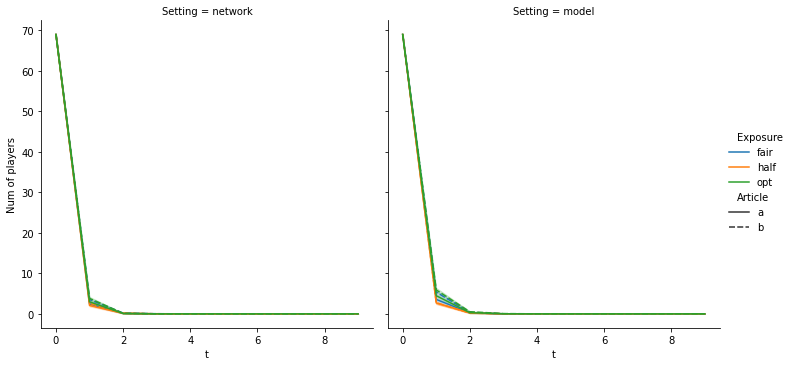

In [33]:
g1 = sns.relplot(data=df, x="t", y="N", col="Setting", hue="Exposure", style='Article', kind="line")
g1.set(ylabel='Num of players')

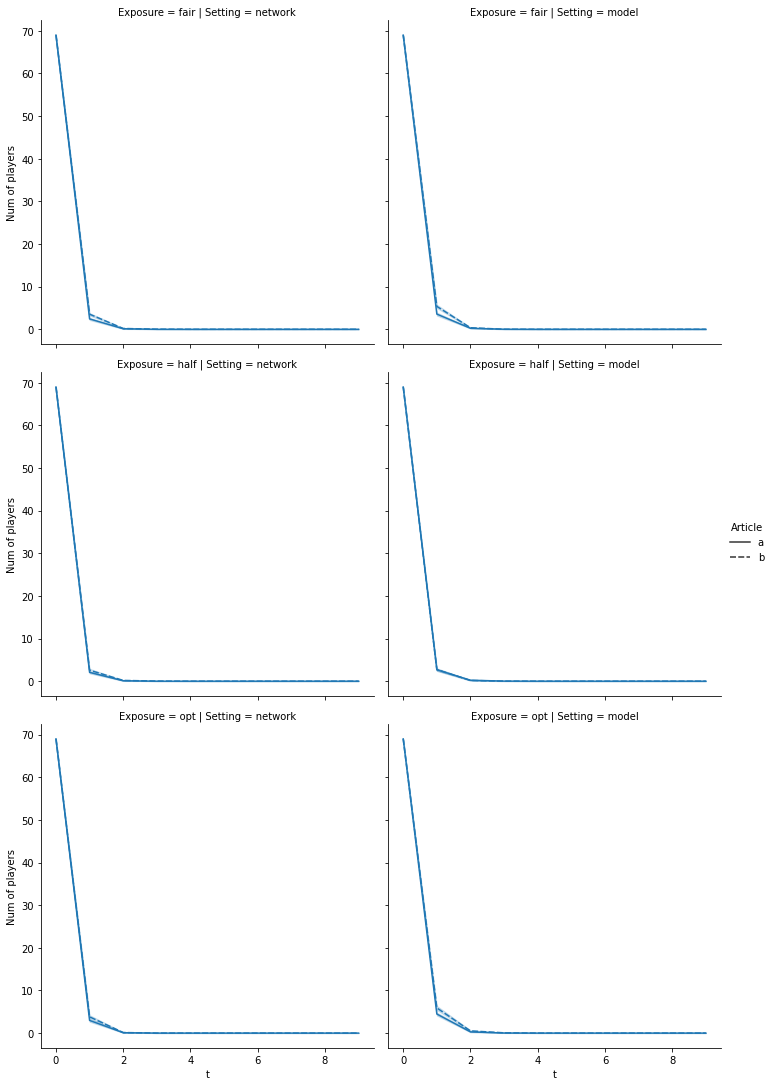

In [34]:
# break down by exposure level
g2 = sns.relplot(data=df, x="t", y="N", col="Setting", row="Exposure", style='Article',kind="line")
g2.set(ylabel='Num of players')

#### Zoom in

We center the x axis around step $t=1$ to highlight the differences between the model and the network (since both start with the same number of users and both drop to zero very quickly, this is the step where most of the differences lie).

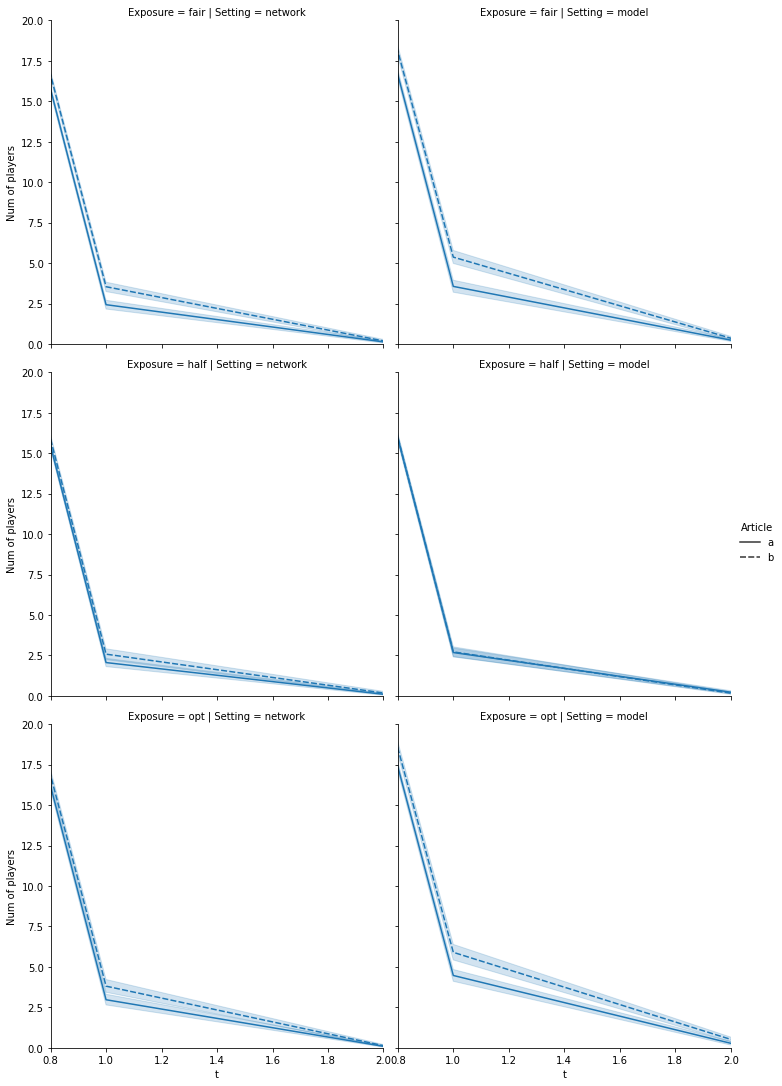

In [35]:
# zoom in
g2.axes[0, 0].set_xlim(0.8, 2)
g2.axes[0, 0].set_ylim(0, 20)
g2.fig

It seems that the model and the network are quite similar in terms of the number of players and the exposure to the articles.

### Breakdown by group

In this section we distinguish between players of different groups.

In [36]:
df_breakdown = df.melt(id_vars=['t', 'Setting', 'Exposure'], value_vars=['A', 'B'])
df_breakdown = df_breakdown.rename(columns={'variable': 'Group'})

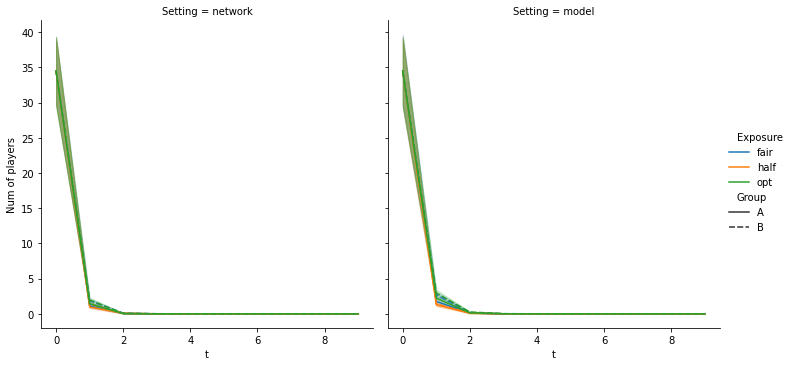

In [37]:
g3 = sns.relplot(data=df_breakdown, x="t", y="value", col="Setting", hue="Exposure", style='Group', kind="line")
g3.set(ylabel='Num of players')

#### Zoom in

The graphs below are the number of players by article and exposure level for the first two steps of the propagation when this assumption does not hold. We zoom in centered around step $t=1$ because that's where most differences between the network and the model lie).

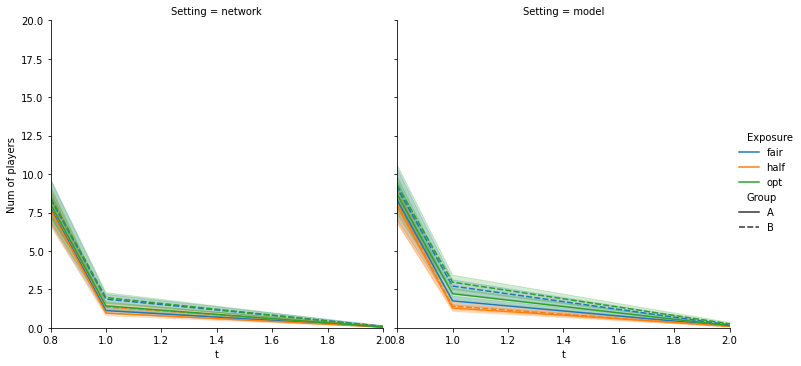

In [38]:
g3.axes[0, 0].set_xlim(0.8, 2)
g3.axes[0, 0].set_ylim(0, 20)
g3.fig

## Evaluation of the assumptions

What happens when we drop some of the assumptions we made in the propagation of the articles through the network?

### Drop Assumption 1: "*Only one of the followers shares the article*"

When we make the assumption we sample only one follower for each user that shared the article and give the follower the choice to share it again. This is to imitate how the model chooses the new generation of users (it clones each user once).

In [39]:
df1 = pd.read_csv(path.join(RESULTS_PATH, 'abortion_results_not_takeone.csv'))
df1_breakdown = df1.melt(id_vars=['t', 'Setting', 'Exposure'], value_vars=['A', 'B'])
df1_breakdown = df1_breakdown.rename(columns={'variable': 'Group'})

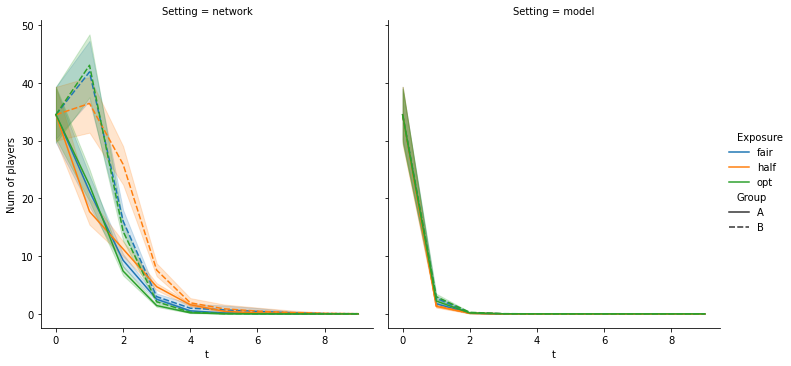

In [40]:
g5 = sns.relplot(data=df1_breakdown, x="t", y="value", col="Setting", hue="Exposure", style='Group', kind="line")
g5.set(ylabel='Num of players')

We observe that the num of players in the network propagation is not always decreasing monotonically. This is because, if the assumption does not hold, the exposure is multiplied by all the friends (as opposed to just one) and thus there could be more users in the system than in the previous step.

### Drop Assumption 2: "*A user can only appear once in the propagation through the network*"

In the network propagation we make sure that each new generation of users does not include users that have shared the article in the past (we blacklist them). In this section, we look at the differences between the network and the model when we do not follow this assumption, that is, we allow users to repeat (e.g., a users is a follower of one of their followers).

The graphs below are the number of players by article and exposure level for the first two steps of the propagation when Assumption 2 does not hold. We centered around step $t=1$ because that's where most differences between network and model lie).

In [41]:
df2 = pd.read_csv(path.join(RESULTS_PATH, 'abortion_results_no_repetitions.csv'))
df2_breakdown = df2.melt(id_vars=['t', 'Setting', 'Exposure'], value_vars=['A', 'B'])
df2_breakdown = df2_breakdown.rename(columns={'variable': 'Group'})

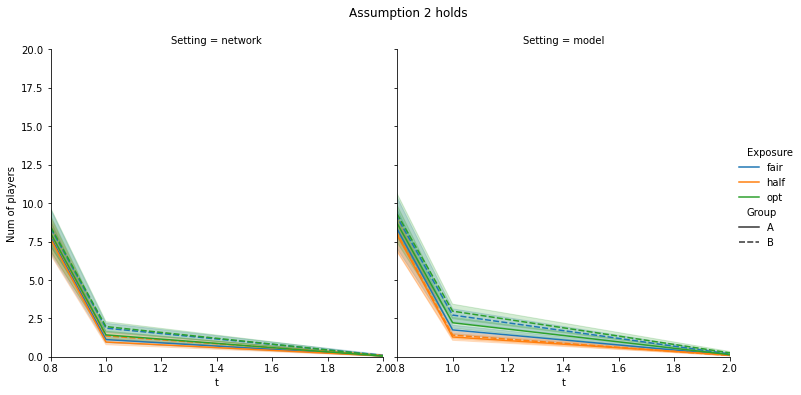

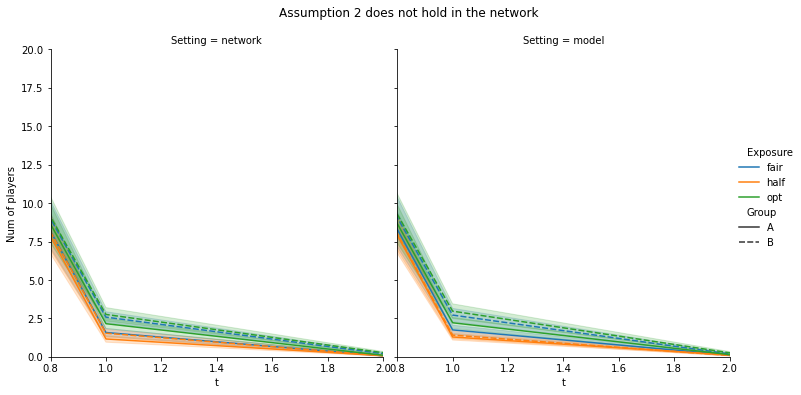

In [42]:
g6 = sns.relplot(data=df2_breakdown, x="t", y="value", col="Setting", hue="Exposure", style='Group', kind="line")
g6.set(ylabel='Num of players')
g6.fig.suptitle('Assumption 2 does not hold in the network', size=12, y=1.05)
g6.axes[0, 0].set_xlim(0.8, 2)
g6.axes[0, 0].set_ylim(0, 20)


# with the assumption:
g3.fig.suptitle('Assumption 2 holds', size=12, y=1.05)
g3.axes[0, 0].set_xlim(0.8, 2)
g3.axes[0, 0].set_ylim(0, 20)
g3.fig

It seems the results obtained with the model are slightly closer to the network's if we drop the assumption that each user can only appear once when we propagate the article through the network. This could be because the assumption restricts too much the propagation (propagation paths might end sooner).

### Drop Assumption 3: "*Take the edge probabilities instead of sampling from the fitted beta distribution*"

The model uses the beta distributions that we fitted from the labeled seeds in the graph. However, the dataset also has sharing probabilities of each article for nodes that are not labeled. We experiment with propagating the articles sampling from the beta distribution (like in the model) versus using the sharing probabilities in the graph.

In [43]:
df3 = pd.read_csv(path.join(RESULTS_PATH, 'abortion_results_probs.csv'))
df3_breakdown = df3.melt(id_vars=['t', 'Setting', 'Exposure'], value_vars=['A', 'B'])
df3_breakdown = df3_breakdown.rename(columns={'variable': 'Group'})

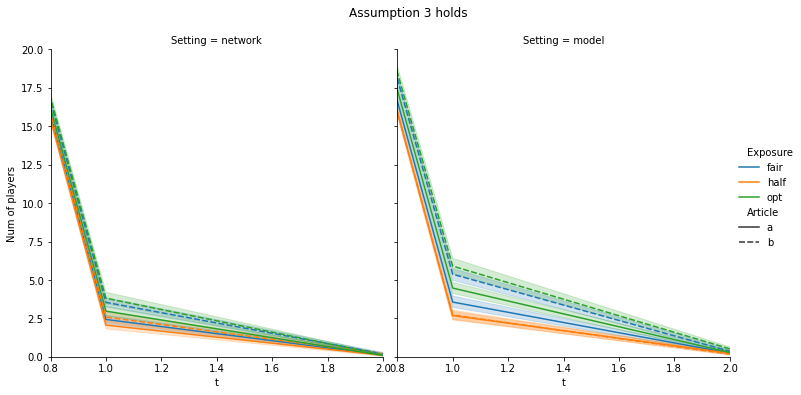

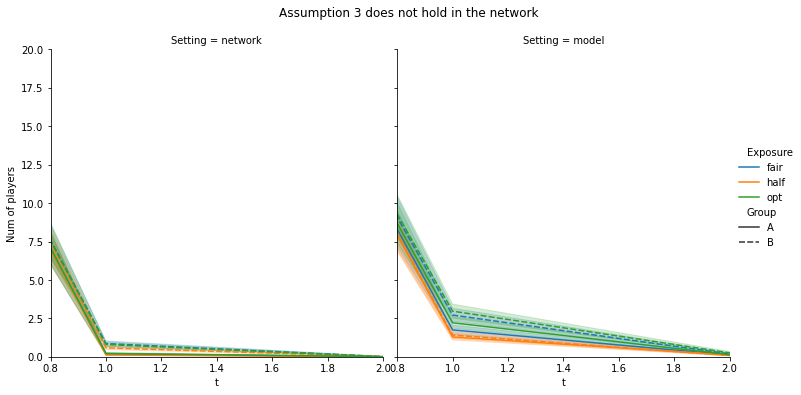

In [44]:
g7 = sns.relplot(data=df3_breakdown, x="t", y="value", col="Setting", hue="Exposure", style='Group', kind="line")
g7.set(ylabel='Num of players')
g7.fig.suptitle('Assumption 3 does not hold in the network', size=12, y=1.05)
g7.axes[0, 0].set_xlim(0.8, 2)
g7.axes[0, 0].set_ylim(0, 20)

# with the assumption:
g1.fig.suptitle('Assumption 3 holds', size=12, y=1.05)
g1.axes[0, 0].set_xlim(0.8, 2)
g1.axes[0, 0].set_ylim(0, 20)
g1.fig

We observe a significant drop in the number of players when we use the graph probabilities. We identify two possible explanations:

1. There is a bias in the sharing distributions of the seeds (labeled nodes) wrt the rest of the network.
2. There is a significant amount of errors in the community detection algorithms we used to label the nodes.